<a href="https://colab.research.google.com/github/nafeelapary/Noise-induced-phenomenon/blob/main/Simulation_of_Noise_induced_phenoma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simulation of White Noise**

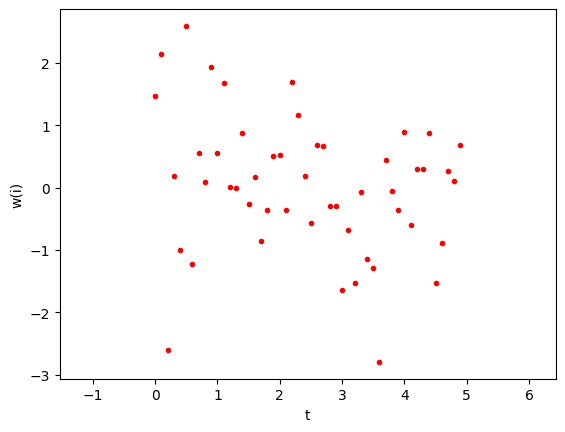

In [3]:
from numpy import*
from pylab import*
N= 50
w= randn(N)
dt=0.1
x=zeros(N)
t=zeros(N)
for i in range(N-1):
  x[i+1]=x[i]+sqrt(dt)*w[i]
  t[i+1]=t[i]+dt
plot(t,w,'.',color='r')
xlabel('t')
ylabel('w(i)')
axis('equal')
show()

 **Free Diffusion Trajectories**

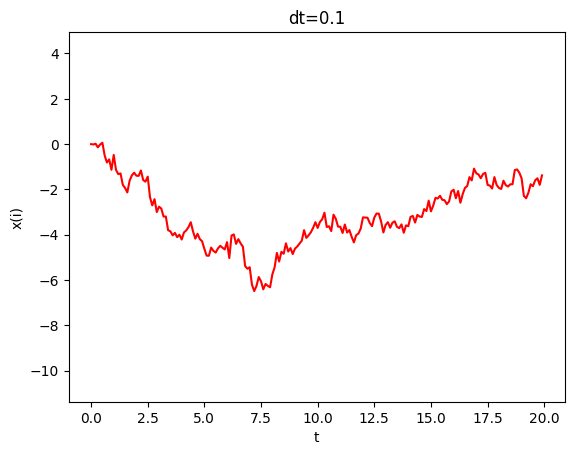

In [6]:
from numpy import*
from pylab import*
N= 200
w= randn(N)
dt=0.1
x,t=0,0
x=zeros(N)
t=zeros(N)
for i in range(N-1):
  x[i+1]=x[i]+sqrt(dt)*w[i+1]
  t[i+1]=t[i]+dt
plot(t,x,'r')
xlabel('t')
ylabel('x(i)')
title('dt=0.1')
axis('equal')
show()

**Gaussian distribution of Random walk**

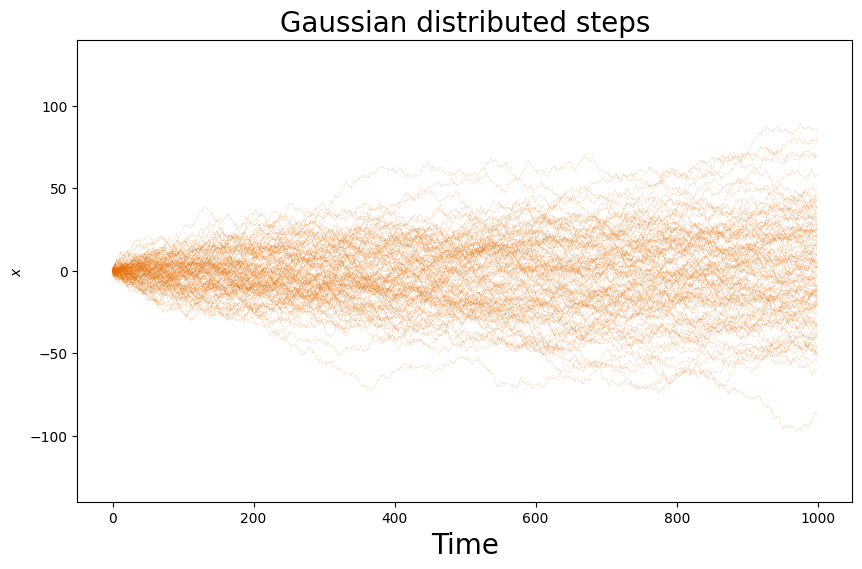

In [8]:
import numpy as np
from matplotlib import pyplot as plt

N = 1000                # Number of steps
n = 10000               # Number of copies
r = np.random.randn(N,n)# Random steps with a Gaussian distribution
x = [np.cumsum(r,axis=0)]# Computing trajectories from random numbers
plt.figure(figsize=(10,6))
for subplot,trajectories in zip([1],x):
    plt.plot(trajectories[:,:100],linewidth=0.1,color='#E66C00')
    plt.ylim([-140,140])
    plt.xlabel("Time",fontsize=20)
    plt.ylabel('$x$',fontsize=10)
    plt.title('Gaussian distributed steps', fontsize=20)
    plt.show()


**FROM BALLISTIC MOTION TO BROWNIAN DIFFUSION**

**Inertial Regime**

5.777777777777777e-07


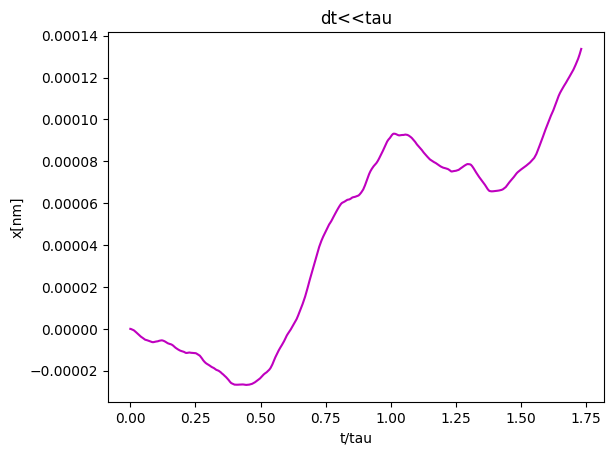

In [12]:
from numpy import*
from pylab import*
N=10000  #no.of samples
x,t=0,0 #initial conditions
dt=1e-10
R=1e-6  #Radius of particle
T=300   #Temperature
eta=0.001#visosity of fluid
d=2.6e+3 #density
kb=1.38e-23 #boltzman's constant
gamma=6*pi*R*eta
m= 4/3*pi*(R**3)*d #mass
tau=m/gamma

x=zeros(N)
t=zeros(N)

for i in range(N):
    r=sqrt(2*kb*T*gamma)/(m+dt*gamma)*randn()
    x[i]= (2+dt*gamma/m)/(1+dt*gamma/m)*x[i-1] - 1/(1+dt*gamma/m)*x[i-2]+r
    t[i]=t[i-1]+dt
print(tau)

plot(t/tau,x*1e-9,'m')
xlabel('t/tau')
ylabel('x[nm]')
title('dt<<tau')
show()


**Diffusive Regime**

Timestep:1e-9
5.305164769729844e-07


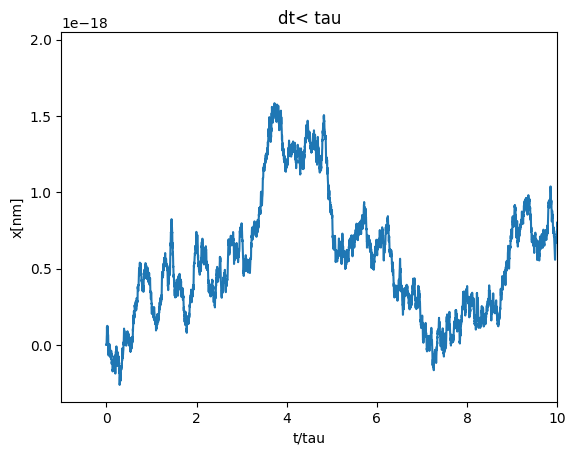

In [25]:
from numpy import*
from pylab import*
N= 10000
dt=float(input('Timestep:'))
T=300
R=1e-6
eta=0.001
kb=1.38e-23
gamma=6*pi*R*eta
D=kb*T/gamma
m=1e-14
tau=m/gamma
x=zeros(N)
t=zeros(N)
for i in range(N-1):
  x[i+1]=x[i]+sqrt(2*D*dt)*randn()
  t[i+1]=t[i]+dt

print (tau)
plot(t/tau,x*1e-9)
xlabel('t/tau')
ylabel('x[nm]')
title('dt< tau')
xlim(-1,10)
show()

**BROWNIAN MOTION IN AN OPTICAL TRAP**

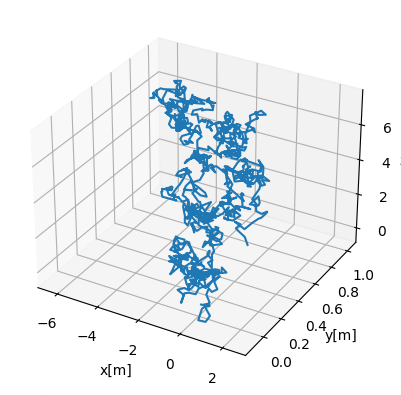

In [26]:
import matplotlib.pyplot as plt
from numpy import*
from pylab import*
from mpl_toolkits import mplot3d
ax=plt.axes(projection="3d")
N=1000
dt=1e-3
R=1e-6
T=300
eta=0.001
kx,ky,kz=1e-6,1e-6,0.2e-6
kb=1.38e-23
gamma=6*pi*R*eta
D=kb*T/gamma
t= arange(0,(N-1)*dt,dt)
#t=zeros(N)
x,y,z= zeros(N),zeros(N),zeros(N)

for i in range(N):
    x[i] = x[i-1] - kx*dt/gamma*x[i-1]
    y[i] = y[i-1] - ky*dt/gamma*y[i-1]
    z[i] = z[i-1] - kz*dt/gamma*z[i-1]
    x[i] = x[i-1] + sqrt(2*D*dt)*randn()
    y[i] = y[i-1] + sqrt(2*D*dt)*randn()
    z[i] = z[i-1] + sqrt(2*D*dt)*randn()
    #t[i+1]= t[i]+ dt

ax.plot(x,y,z)
ax.set_xlabel('x[m]')
ax.set_ylabel('y[m]')
ax.set_zlabel('z[m]')
#axis('equal')
show()

**Probability distribution**

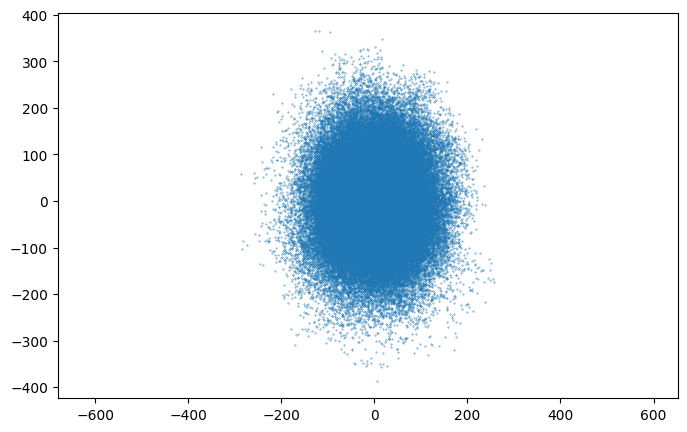

In [32]:
import numpy as np
from matplotlib import pyplot as plt
T = 300                # Temperature
kB = 1.38e-23          # Boltzmann coefficient
R = 1e-6               # Radius of the Brownian particle
kx = 1e-6              # Stiffness of the optical trap along x
ky = 5e-7              # Stiffness of the optical trap along y
gamma = 0.006*np.pi*R  # Drag coefficient of the medium
N = int(1e5)           # Simulation steps
dt = 1e-3              # Time step

x = np.zeros(N)    # Initiated trajectory array x
y = np.zeros(N)    # Initiated trajectory array y
Wx=np.random.randn(N)  # Gaussian distributed random numbers
Wy=np.random.randn(N)  # Gaussian distributed random numbers

for i in range(N-1):
    x[i+1] = x[i] - kx*x[i]*dt/gamma + np.sqrt(2*kB*T*dt/gamma)*Wx[i]      # Overdamped Langevin equation x
    y[i+1] = y[i] - ky*y[i]*dt/gamma + np.sqrt(2*kB*T*dt/gamma)*Wy[i]      # Overdamped Langevin equation y

### Plotting the 2D trajectory

plt.figure(figsize=(8,5))
plt.plot(x*1e9,y*1e9,'.',markersize=0.6)
plt.axis('equal')
plt.show()

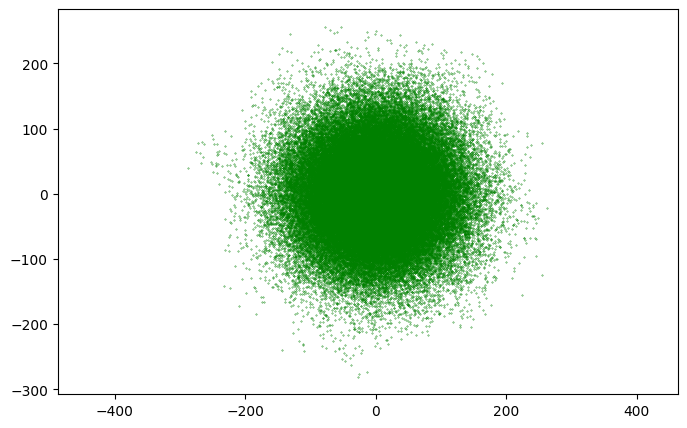

In [33]:
import numpy as np
from matplotlib import pyplot as plt
T = 300                # Temperature
kB = 1.38e-23          # Boltzmann coefficient
R = 1e-6               # Radius of the Brownian particle
kx = 1e-6              # Stiffness of the optical trap along x
ky = 1e-6              # Stiffness of the optical trap along y
gamma = 0.006*np.pi*R  # Drag coefficient of the medium
N = int(1e5)           # Simulation steps
dt = 1e-3              # Time step

x = np.zeros(N)    # Initiated trajectory array x
y = np.zeros(N)    # Initiated trajectory array y
Wx=np.random.randn(N)  # Gaussian distributed random numbers
Wy=np.random.randn(N)  # Gaussian distributed random numbers

for i in range(N-1):
    x[i+1] = x[i] - kx*x[i]*dt/gamma + np.sqrt(2*kB*T*dt/gamma)*Wx[i]
    y[i+1] = y[i] - ky*y[i]*dt/gamma + np.sqrt(2*kB*T*dt/gamma)*Wy[i]

### Plotting the 2D trajectory

plt.figure(figsize=(8,5))
plt.plot(x*1e9,y*1e9,'.',color='g',markersize=0.6)
plt.axis('equal')
plt.show()


**Kramer’s Transition**

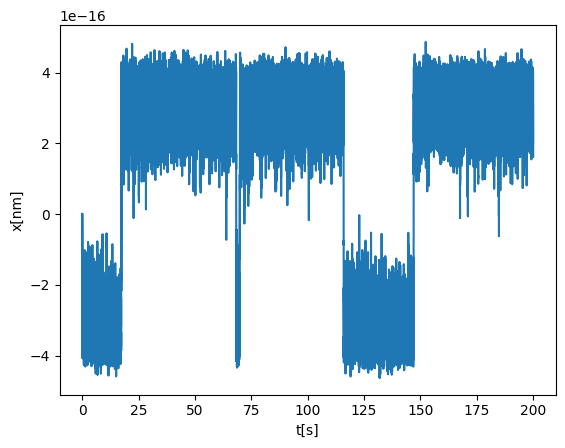

In [34]:
import numpy as np
from matplotlib import pyplot as plt
T = 300                # Temperature
kB = 1.38e-23          # Boltzmann coefficient
R = 1e-6               # Radius of the Brownian particle
kx = 1e-6              # Stiffness of the optical trap along x
ky = 5e-7              # Stiffness of the optical trap along y
gamma = 0.006*np.pi*R  # Drag coefficient of the medium
N = int(2e+6)
dt = 1e-4
a=1e7
b=1e-6

x = np.zeros(N)
t = np.arange(0, N*dt, dt)
Wx=np.random.randn(N)
for i in range(N-1):
    l= np.sqrt(2*kB*T*dt/gamma)*Wx[i]
    x[i+1] = x[i] - a*dt/gamma*(x[i])**3 + b*dt/gamma*(x[i])+ l

plt.plot(t,x*1e-9,markersize=0.6)
plt.xlabel('t[s]')
plt.ylabel('x[nm]')
plt.show()
